In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_epi_data(fileName, popData, start= 1, thre= 100):
    epiOData = np.genfromtxt(fileName, delimiter=',', skip_header= 0)[:, 1:]
    requireNum= 80
    epiOData = epiOData[start:start+requireNum, :]
    print(epiOData.shape)
    epiODataNew= np.zeros((requireNum,epiOData.shape[1]))
    epiODataNew[requireNum-epiOData.shape[0]:, :]= epiOData.copy()
    epiOData = epiODataNew
    epiData= epiOData.copy()/popData[None, :]
    sumEpiData= np.sum(epiOData, axis= 0)
    sumEpiData= np.max(sumEpiData)+sumEpiData
    ranked_indices = np.argsort(sumEpiData)
    return epiOData, epiData, ranked_indices
Epi= "covid" # sars, covid, H1N1
# Read the CSV file into a NumPy array
popData = np.genfromtxt('empirical_data/populations.csv', delimiter=',', skip_header= 0)#800,  china= 1
file_path = 'empirical_data/Country_Population_final.csv'
data = pd.read_csv(file_path)
popName= data["Country"].tolist()
epiODataSars, epiDataSars, ranked_indices_Sars= read_epi_data('empirical_data/infected_numbers_sars.csv', popData, 1)
epiODataH1N1, epiDataH1N1, ranked_indices_H1N1= read_epi_data('empirical_data/infected_numbers_H1N1.csv', popData, 1)
epiODataCovid, epiDataCovid, ranked_indices_Covid= read_epi_data('empirical_data/infected_numbers_covid.csv', popData, 1)

ranked_pop= np.argsort(popData)

(80, 234)
(50, 234)
(80, 234)


93


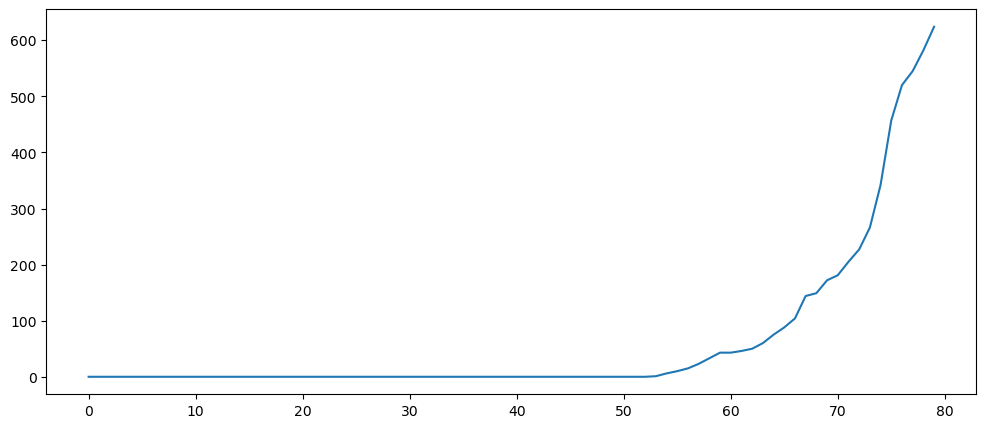

In [17]:
lastUsed= -5 #84
usedIdx= set(ranked_indices_Covid[-81:]).union(set(ranked_indices_Sars[-5:])).union(set(ranked_indices_H1N1[-42:]))

print(len(usedIdx))
plt.figure(figsize=(12, 5))
plt.plot(epiODataCovid[: , ranked_indices_Covid[-81]])

In [18]:
testEpiData= np.concatenate([epiODataSars[:, np.array(list(usedIdx))], 
                             epiODataH1N1[:, np.array(list(usedIdx))], 
                             epiODataCovid[:, np.array(list(usedIdx))] ])
print(testEpiData.shape)
testPopData= popData[np.array(list(usedIdx))]
print(testPopData.shape)
np.savetxt(f'testData/test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop_inx.csv', np.array(list(usedIdx)), delimiter=',', fmt='%d')

(240, 93)
(93,)
